Run the cell below if you are using Google Colab to mount your Google Drive in your Colab instance. Adjust the path to the files in your Google Drive as needed if it differs.

If you do not use Google Colab, running the cell will simply do nothing, so do not worry about it.

In [1]:
try:
    from google.colab import drive
    drive.mount('/content/drive/')
    %cd 'drive/My Drive/Colab Notebooks/07_TextMining'
except ImportError as e:
    pass

## Exercise 7: Text Mining

### 7.1. Which documents are similar?

#### 7.1.1. The file documents.zip is provided in ILIAS and contains three corpora. Load and vectorize the 4-documents corpus using the load_files function. How many different attributes has the generated example set?

In [2]:
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import pandas as pd

corpus_4_docs = load_files('DataSetEx7', categories=['corpus-4docs'], encoding='utf-8')

# create a vectorizer and transform the documents


#### 7.1.2.	Examine the generated word list. What are the most common words? Look for the three most common words that might be helpful for text mining tasks!

In [2]:
import pandas as pd

def generate_word_list(X, Y, feature_names, target_names):
    d = pd.DataFrame(X.toarray(), columns=feature_names)
    doc = d[ d>0 ].count()
    d = d.assign(target=Y)
    d = d.groupby(by='target').sum()
    d = d.transpose()
    d.columns = target_names
    total = d.sum(axis=1)
    d = d.assign(total_occurrences=total)
    d = d.assign(document_occurrences=doc)
    d = d.sort_values(by='total_occurrences', ascending=False)
    return d

In [1]:
# create the word list from the transformed dataset and show it


##### 7.1.3. Remove stopwords and apply the porter stemmer. By how many attributes do the operators reduce the size of your example set?

In [4]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
import re, string

stemmer = PorterStemmer()
token_pattern = re.compile(r"(?u)\b\w\w+\b")
my_stopwords = set(stopwords.words('english'))

def tokenize(text):
    stems = []
    tokens = token_pattern.findall(text)
    for item in tokens:
        if item not in my_stopwords:
            stems.append(stemmer.stem(item))
    return stems

In [3]:
# create a new vectorizer with stemming and transform the documents again

# re-create the word list based on the new vectorizer


#### 7.1.4.	Compute the cosine similarity on TF-IDF vectors between the documents with the cosine_similarity function. Which documents are most similar? Can you confirm the judgment of the algorithm by reading the documents?

In [4]:
from sklearn.metrics.pairwise import cosine_similarity

# create a vectorizer that uses TF-IDF weights


# calculate the cosine similarity between all documents and show the results


In [ ]:
# print the two most similar documents

#TODO: change the indices to the indices of the most similar documents
idx1 = 0
idx2 = 0

print(corpus_4_docs.data[idx1][:500])
print('\n==================\n')
print(corpus_4_docs.data[idx2][:500])

#### 7.1.5.	Experiment with different similarity metrics as well as with different vector creation methods. Which combination produces the best similarity scores? 

for different pairwise distances you can use the [pairwise_distances function](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html)

In [6]:
from sklearn.metrics.pairwise import *
from sklearn.feature_extraction.text import *

# create different vectorizers


# calcualte the features


# calculate different similarity/distance functions


### 7.2. Cluster the 30-Documents Corpus
#### 7.2.1.	The 30-documents corpus contains postings from three news groups. Vectorize the 30-documents corpus, remove stopwords and stem the corpus. 

In [7]:
corpus_30_docs = load_files('DataSetEx7/corpus-30docs',encoding='utf-8')

# vectorize the documents


#### 7.2.2. Use K-Means to cluster the corpus.  Compare how many documents from the same category end up in the same cluster!

In [8]:
from sklearn.cluster import KMeans

# run the clusterer


# check the results: compare the cluster IDs to the target values (document categories)


#### 7.2.3.	Examine the distribution of frequent words over the three different classes in the word list. Does the distribution give you an idea how you could improve the clustering using any of the prune methods (max_df, min_df)?

In [9]:
# print the word list sorted by document occurrences

Answer:

In [10]:
# change the vectorizer and include pruning based on document frequency of tokens


# re-run the clusterer


# check if the results improved


## 7.3. Learn a Classifier for the 300-Documents Corpus
The 300-documents corpus contains postings from three different news groups. Vectorize
the 300-documents corpus and learn a classifier for classifying the postings. Evaluate the
classifier using 10-fold X-Validation. Which accuracy does your classifier reach? Increase the
performance of your classifier by pruning the document vectors.

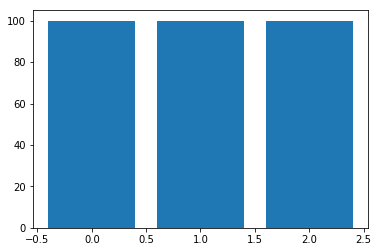

In [18]:
import matplotlib.pyplot as plt

corpus_300_docs = load_files('DataSetEx7/corpus-300docs',encoding='utf-8')

class_dist = pd.Series(corpus_300_docs.target).value_counts()
plt.bar(class_dist.index, class_dist)
plt.show()

In [11]:
# create a vectorizer

# inspect the word list

First, we create a baseline model with all features:

In [12]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.naive_bayes import MultinomialNB

# create a vectorizer for your baseline


# define the cross-validation splits
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# evaluate a baseline model


Then, we test different pruning approaches:

In [13]:
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# define a pipeline and parameter grid


# define the cross-validation splits for the nested CV
nested_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# define and evaluate a grid search


### 7.4. Learn a Classifier for the Job Postings
#### 7.4.1.	The Job Postings corpus contains 500 descriptions of open positions belonging to 30 different job categories. The corpus is provided as an Excel file in ILIAS. Vectorize the corpus  and learn a Naïve Bayes classifier for classifying the job adds. Evaluate the classifying using 10-fold X-Validation. Analyze the classifier performance and the word list. What do you discover? 

In [22]:
import pandas as pd
job_postings = pd.read_excel('DataSetEx7/JobPostings.xls')
job_postings.head()

,Category,JobText
0,customer service,OGPlanet (www.ogplanet.com) is an online game ...
1,customer service,Our company is right now looking for a full-ti...
2,customer service,<br>\nARE YOU READY TO TAKE YOUR CAREER TO THE...
3,customer service,"Due to rapid growth, we currently have several..."
4,customer service,<br>\nOur growing coffee company is looking fo...


In [23]:
job_postings_target = job_postings['Category']
job_postings_data = job_postings['JobText']

In [14]:
import matplotlib.pyplot as plt

# plot and inspect the class distribution

In [15]:
# vectorize the documents and show the word list

#### 7.4.2 Experiment with different vector creation and pruning methods as well as different types of classifiers in order to increase the performance. What is highest accuracy that you can reach? Which problem concerning precision and recall does remain?

In [16]:
# setup and evaluate a baseline model

In [17]:
from sklearn.tree import DecisionTreeClassifier

# create a pipeline and parameter grid


# create and evaluate a grid search


# ChatGPT Bonus Exercises
Reminder: Do not take the answers of ChatGPT at face value! Always cross-check with lecture slides, literature and/or the teaching staff!

### C.1. Discuss about Text Mining and preprocessing steps for textual data
* Discuss with ChatGPT the common preprocessing steps used in text mining. Ask it to explain to you a preprocessing step listed that you did not understand. Example: What is POS tagging and how can you use it?
* Pre-trained language models such as BERT outperform traditional, bag-of-words based NLP methods on many text classification tasks. Discuss with ChatGPT the potential reasons for the improved performance.

### C.2. Learn about Feature Generation and Feature Selection
* Ask ChatGPT how you can generate features from textual data. Further ask it to provide you an example code of generating features from text using TF-IDF. For the same documents, ask it to show you how you can generate features using word embeddings.

In [ ]:
# put your code here

* In applications, not all features that are generated are helpful and/or may lead to the “curse of dimensionality”. Ask ChatGPT what the curse of dimensionality is (in the context of text mining) and some common feature selection methods that are used to overcome it. Further ask for an example textual dataset and how to perform feature selection on it. Choose a classification algorithm and learn a model using the data from before feature selection and after and compare the performance of the two models learned. Did feature selection help in this case regarding training time and model performance? 

In [ ]:
# put your code here

### C.3. Self-Assessment
* Ask ChatGPT to give you some multiple-choice questions for graduate students related to text mining. Request the correct answers and compare with your own answers.
* Ask ChatGPT to generate you some short documents and to give you a paper and pen exercise to calculate binary term occurrence vectors of the documents. Find the most similar documents using Jaccard similarity. Ask ChatGPT to give you the answers when you have finished the exercise.